In [1]:
#import library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv('train.csv').drop(['Var_1', 'Segmentation'], axis=1)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 567.4+ KB


In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

In [6]:
le = LabelEncoder()
df['Profession'] = le.fit_transform(df['Profession'])
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,5,1.0,Low,4.0
2,466315,Female,Yes,67,Yes,2,1.0,Low,1.0
3,461735,Male,Yes,67,Yes,7,0.0,High,2.0
5,461319,Male,Yes,56,No,0,0.0,Average,2.0
6,460156,Male,No,32,Yes,5,1.0,Low,3.0
...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,0,0.0,High,5.0
8064,464685,Male,No,35,No,4,3.0,Low,4.0
8065,465406,Female,No,33,Yes,5,1.0,Low,1.0
8066,467299,Female,No,27,Yes,5,1.0,Low,4.0


In [7]:
df['Ever_Married'] = df['Ever_Married'].map(dict(Yes=1, No=0))
df['Graduated'] = df['Graduated'].map(dict(Yes=1, No=0))
df['Spending_Score'] = df['Spending_Score'].map(dict(High=2, Average=1, Low=0))
df['Gender'] = df['Gender'].map(dict(Male=1, Female=0))

In [8]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,1,0,22,0,5,1.0,0,4.0
2,466315,0,1,67,1,2,1.0,0,1.0
3,461735,1,1,67,1,7,0.0,2,2.0
5,461319,1,1,56,0,0,0.0,1,2.0
6,460156,1,0,32,1,5,1.0,0,3.0


In [9]:
scaler = MinMaxScaler()  
def Normalize(df):
  for each in df.columns.tolist():
    if each == 'ID':
      continue
    if str(df[each].dtypes) == 'int64' or str(df[each].dtypes) == 'float64':
      df[each] = scaler.fit_transform(df[each].values.reshape(-1,1))      

In [10]:
df_norm = df.copy()
Normalize(df_norm)

In [11]:
df_norm.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,1.0,0.0,0.056338,0.0,0.625,0.071429,0.0,0.375
2,466315,0.0,1.0,0.690141,1.0,0.250,0.071429,0.0,0.000
3,461735,1.0,1.0,0.690141,1.0,0.875,0.000000,1.0,0.125
5,461319,1.0,1.0,0.535211,0.0,0.000,0.000000,0.5,0.125
6,460156,1.0,0.0,0.197183,1.0,0.625,0.071429,0.0,0.250


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


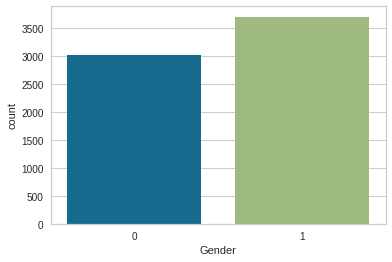

In [12]:
sns.countplot(df['Gender'])

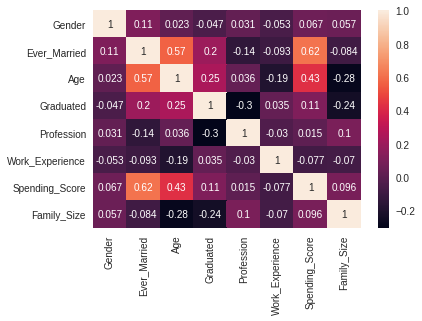

In [13]:
sns.heatmap(df_norm.drop(['ID'],axis=1).corr(),annot=True)

In [14]:
#X = df_norm.drop(['Gender', 'Profession', 'Work_Experience'], axis=1)
X = df_norm.drop('ID', axis=1)
inertia = []
for n in range(1,12):
  clstr = KMeans(n_clusters=n,init='k-means++',random_state=42)
  clstr.fit(X)
  inertia.append(clstr.inertia_)

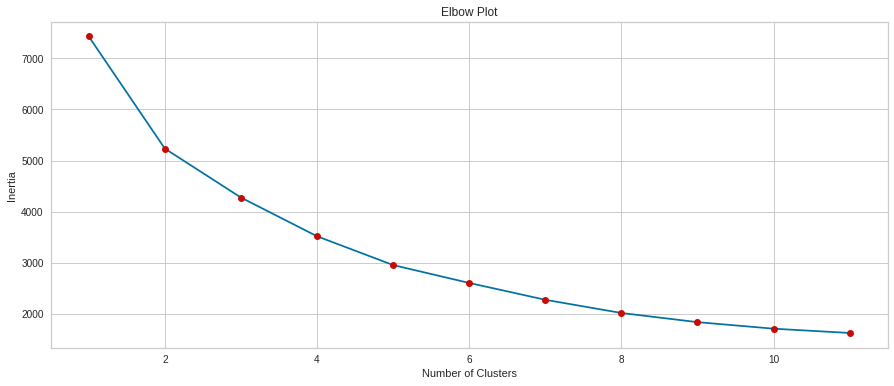

In [15]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(1,12),inertia,'-')
plt.plot(np.arange(1,12),inertia,'o',c='r')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

In [16]:
km = KMeans(n_clusters=2,init='k-means++',random_state=42)
km.fit(X)
predict = km.predict(X)
df['cluster'] = pd.Series(predict, index=df.index)

In [17]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster
0,462809,1,0,22,0,5,1.0,0,4.0,0
2,466315,0,1,67,1,2,1.0,0,1.0,1
3,461735,1,1,67,1,7,0.0,2,2.0,1
5,461319,1,1,56,0,0,0.0,1,2.0,1
6,460156,1,0,32,1,5,1.0,0,3.0,0


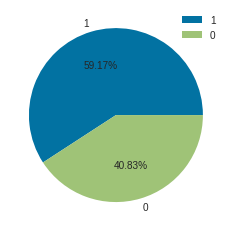

In [18]:
pie_ = df.value_counts('cluster', normalize=True)
plt.pie(pie_, labels=pie_.index, autopct='%1.2f%%')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


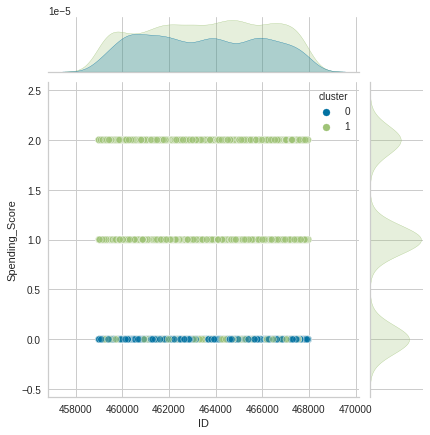

In [19]:
sns.jointplot(data=df, x='ID', y='Spending_Score', hue='cluster', alpha=.6)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


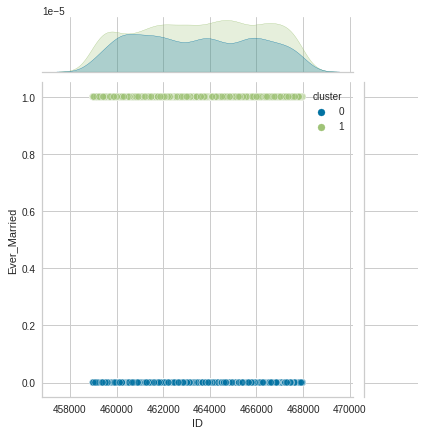

In [20]:
sns.jointplot(data=df, x='ID', y='Ever_Married', hue='cluster', alpha=.6)

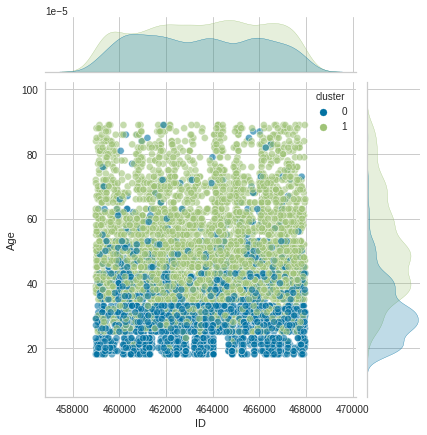

In [21]:
sns.jointplot(data=df, x='ID', y='Age', hue='cluster', alpha=.6)

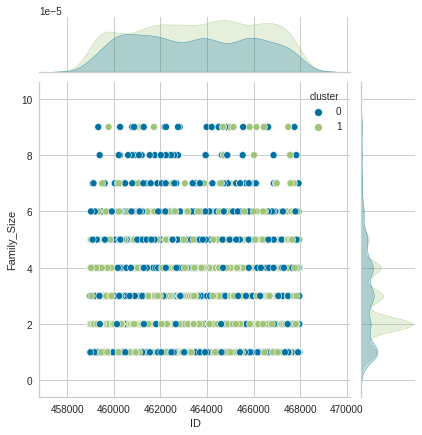

In [22]:
sns.jointplot(data=df, x='ID', y='Family_Size', hue='cluster')

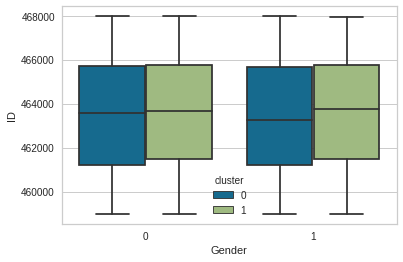

In [23]:
sns.boxplot(data=df, x='Gender', y='ID', hue='cluster')

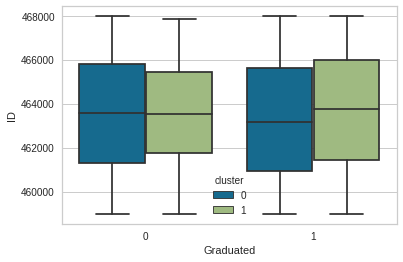

In [24]:
sns.boxplot(data=df, x='Graduated', y='ID', hue='cluster')

([<matplotlib.axis.YTick at 0x7f87fc2a4e10>,
 [])

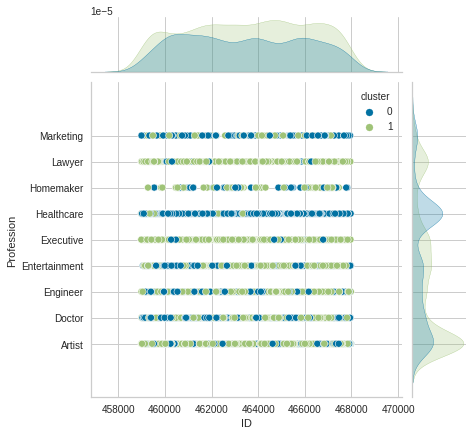

In [25]:
sns.jointplot(data=df, x='ID', y='Profession', hue='cluster')
plt.yticks(np.arange(len(le.classes_)), le.classes_)

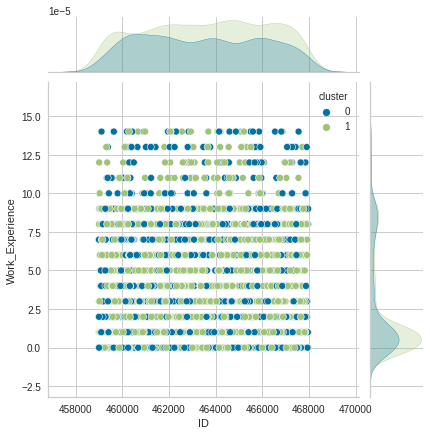

In [26]:
sns.jointplot(data=df, x='ID', y='Work_Experience', hue='cluster')